<a href="https://colab.research.google.com/github/sllpwlkr/Frameworks_7sem_Lupanova/blob/main/PSFII_lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Лабораторная работа №5: Градиентный бустинг

## Задача классификации

### 2. Создание бейзлайна и оценка качества

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Загрузка данных
df = pd.read_csv('apple_quality.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [ ]:
#Предобработка данных
print(df.head(1))
print(df.describe())

   A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0   0.0 -3.970049 -2.512336    5.34633    -1.012009     1.8449   0.32984   

        Acidity Quality  
0  -0.491590483    good  
              A_id         Size       Weight    Sweetness  Crunchiness  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean   1999.500000    -0.503015    -0.989547    -0.470479     0.985478   
std    1154.844867     1.928059     1.602507     1.943441     1.402757   
min       0.000000    -7.151703    -7.149848    -6.894485    -6.055058   
25%     999.750000    -1.816765    -2.011770    -1.738425     0.062764   
50%    1999.500000    -0.513703    -0.984736    -0.504758     0.998249   
75%    2999.250000     0.805526     0.030976     0.801922     1.894234   
max    3999.000000     6.406367     5.790714     6.374916     7.619852   

         Juiciness     Ripeness  
count  4000.000000  4000.000000  
mean      0.512118     0.498277  
std       1.930286     1.8

In [ ]:
#Удаление строк с пропущенными значениями
initial_rows = len(df)
df_clean = df.dropna()
rows_after_cleaning = len(df_clean)
rows_removed = initial_rows - rows_after_cleaning

print(f"\nКоличество строк до удаления пропусков: {initial_rows}")
print(f"Удалено строк с пропущенными значениями: {rows_removed}")

#Сохраняем очищенный df
df = df_clean.copy()


Количество строк до удаления пропусков: 4001
Удалено строк с пропущенными значениями: 1


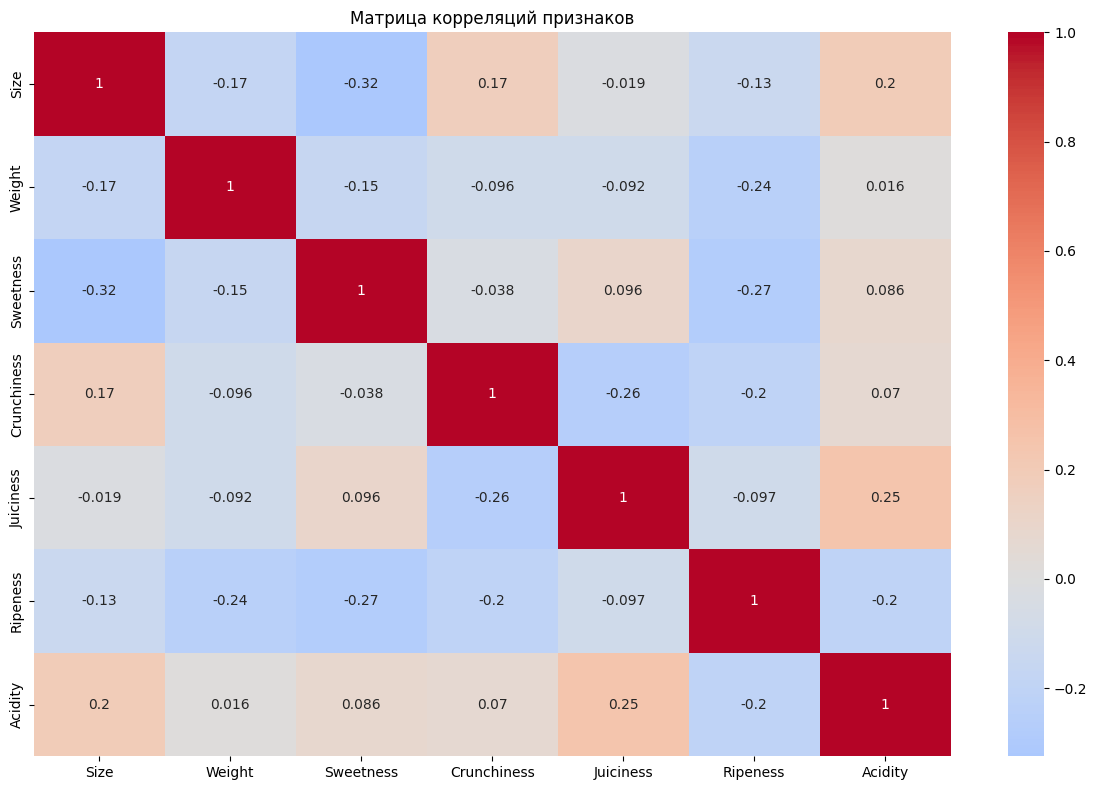

In [ ]:
#Матрица корреляций
plt.figure(figsize=(12, 8))
numeric_df = df.drop(['A_id', 'Quality'], axis=1)
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Матрица корреляций признаков')
plt.tight_layout()
plt.show()

In [ ]:
#Проверим баланс классов
print(df['Quality'].value_counts())

Quality
good    2004
bad     1996
Name: count, dtype: int64


In [ ]:
#Преобразуем целевую переменную из категориального в чиловой признак
le = LabelEncoder()
df['Quality_encoded'] = le.fit_transform(df['Quality'])
print(f"\nКодирование классов: {dict(zip(le.classes_, le.transform(le.classes_)))}")


Кодирование классов: {'bad': np.int64(0), 'good': np.int64(1)}


In [ ]:
#Удаляем колонку с id и разделяем датасет на фичи и целевую переменную
X = df.drop(['A_id', 'Quality', 'Quality_encoded'], axis=1)
y = df['Quality_encoded']

In [ ]:
#Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
#Бейзлайн модель и предсказания
base_model = GradientBoostingClassifier()
base_model.fit(X_train, y_train)

y_pred = base_model.predict(X_test)


GradientBoosting Baseline:
Accuracy: 0.8517
Precision: 0.8522
Recall: 0.8517
F1-score: 0.8516


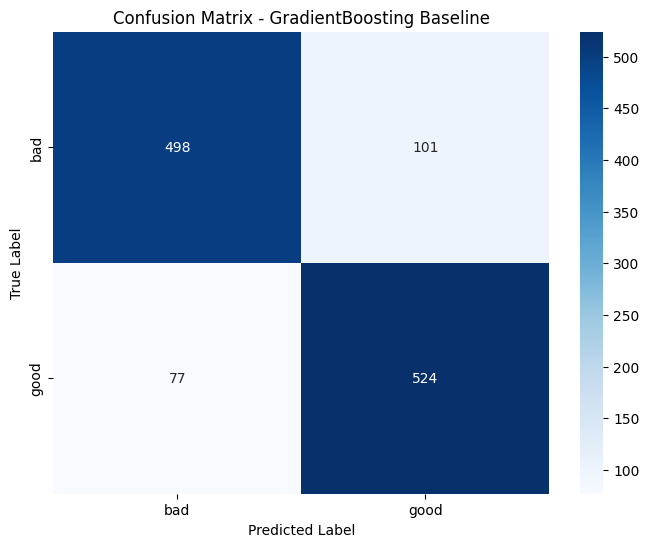

In [ ]:
#Оценка качества
def evaluate_model(y_true, y_pred, model_name="Model"):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"\n{model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")

    # Матрица ошибок
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1}
base_metrics = evaluate_model(y_test, y_pred, "GradientBoosting Baseline")

Модель градиентного бустинга показала хорошее и сбалансированное качество с метриками около 0.85, что подтверждает её эффективность для решения задачи.

### 3. Улучшение бейзлайна

Гипотеза 1: масштабирование признаков

Гипотеза 2: подбор гиперпараметров модели

Гипотеза 3: создание новых полиномиальных признаков


In [ ]:
#Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Модель с масштабированными признаками
model_scaled = GradientBoostingClassifier()
model_scaled.fit(X_train_scaled, y_train)

y_pred_scaled = model_scaled.predict(X_test_scaled)

In [ ]:
#Оценка метрик
print(f"Accuracy: {accuracy_score(y_test, y_pred_scaled):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_scaled):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_scaled):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_scaled):.4f}")

Accuracy: 0.8517
Precision: 0.8384
Recall: 0.8719
F1-score: 0.8548


После скалирования вырос Recall, снизился Precision. В результате этого смещения баланса F1-мера немного улучшилась.

In [ ]:
#Подбор гиперпараметров
param_distributions = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

gb_tuned = GradientBoostingClassifier(random_state=42)
random_search = RandomizedSearchCV(
    gb_tuned,
    param_distributions,
    n_iter=10,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    verbose=0,
)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 4, 5],
                                        'n_estimators': [50, 100, 150]},
                   scoring='f1')

In [ ]:
print(f"Лучшие параметры: {random_search.best_params_}")
print(f"Лучший F1-score: {random_search.best_score_:.4f}")

Лучшие параметры: {'n_estimators': 150, 'max_depth': 5, 'learning_rate': 0.1}
Лучший F1-score: 0.8752


In [ ]:
#Модель с лучшими гиперпараметрами
best_rf = random_search.best_estimator_
y_pred_best = best_rf.predict(X_test)


In [ ]:
#Оценка метрик
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_best):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_best):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_best):.4f}")


Accuracy: 0.8733
Precision: 0.8604
Recall: 0.8918
F1-Score: 0.8758


Подбор гиперпараметров позволил значительно улучшить модель по всем метрикам, особенно по полноте, которая выросла до 0.89.

In [ ]:
#Создание пониномиальных признаков
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [ ]:
print(f"\nРазмерность данных до полиномиального преобразования: {X_train.shape}")
print(f"Размерность данных после полиномиального преобразования: {X_train_poly.shape}")


Размерность данных до полиномиального преобразования: (2800, 7)
Размерность данных после полиномиального преобразования: (2800, 35)


In [ ]:
#Модель с полиномиальными признаками
model_new_features = GradientBoostingClassifier()
model_new_features.fit(X_train_poly, y_train)
y_pred_new_features = model_new_features.predict(X_test_poly)

In [ ]:
#Оценка метрик
print(f"Accuracy: {accuracy_score(y_test, y_pred_new_features):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_new_features):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_new_features):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_new_features):.4f}")

Accuracy: 0.8642
Precision: 0.8454
Recall: 0.8918
F1-score: 0.8680


Добавление полиномиальных признаков улучшило модель по сравнению с бейзлайном. Однако этот прирост оказался меньше, чем от обычного подбора гиперпараметров, где все метрики были выше.

Применим все гипотезы и обучим "улучшенную модель"

In [ ]:
#Применим скалирование с к созданным признакам
X_train_scaled2 = scaler.fit_transform(X_train_poly)
X_test_scaled2 = scaler.transform(X_test_poly)


Impoved GradientBoosting:
Accuracy: 0.8733
Precision: 0.8738
Recall: 0.8733
F1-score: 0.8733


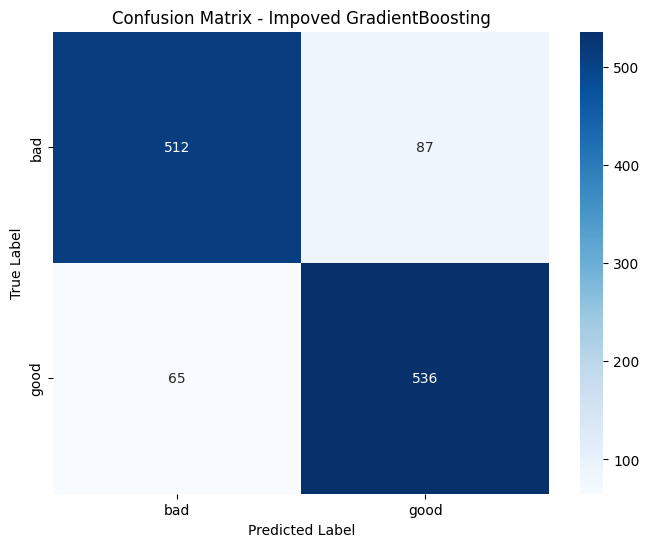

In [ ]:
#Улучшенная модель
model_impoved = GradientBoostingClassifier(n_estimators = 150, max_depth = 5, learning_rate = 0.1)
model_impoved.fit(X_train_scaled2, y_train)
y_pred_impr = model_impoved.predict(X_test_scaled2)

improved_metrics = evaluate_model(y_test, y_pred_impr, 'Impoved GradientBoosting')

In [ ]:
#Сравнение базовой и улучшенной моделей
comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Base Model': [
        base_metrics['accuracy'],
        base_metrics['precision'],
        base_metrics['recall'],
        base_metrics['f1']
    ],
    'Improved Model': [
        improved_metrics['accuracy'],
        improved_metrics['precision'],
        improved_metrics['recall'],
        improved_metrics['f1']
    ]
})
print(comparison)

      Metric  Base Model  Improved Model
0   Accuracy    0.851667        0.873333
1  Precision    0.852220        0.873828
2     Recall    0.851667        0.873333
3   F1-Score    0.851602        0.873287


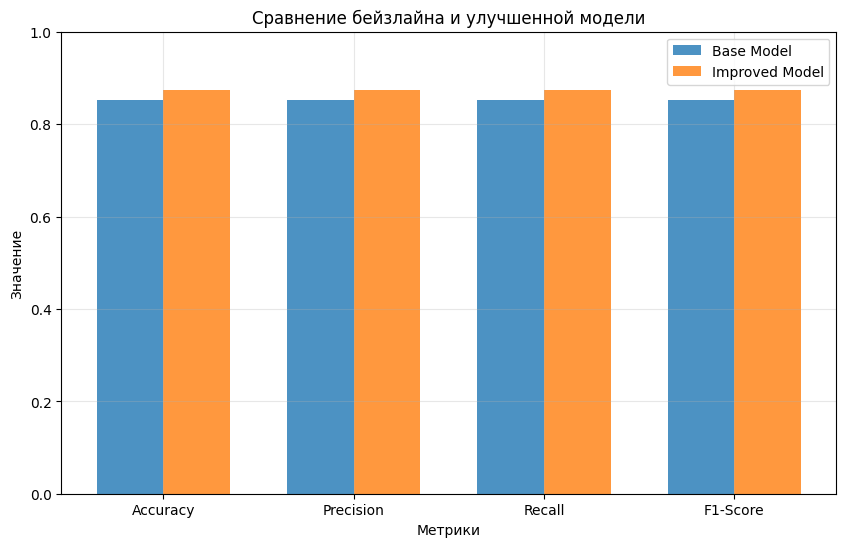

In [ ]:
# Визуализация сравнения
plt.figure(figsize=(10, 6))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(metrics))
width = 0.35

plt.bar(x - width/2, comparison['Base Model'], width, label='Base Model', alpha=0.8)
plt.bar(x + width/2, comparison['Improved Model'], width, label='Improved Model', alpha=0.8)

plt.xlabel('Метрики')
plt.ylabel('Значение')
plt.title('Сравнение бейзлайна и улучшенной модели')
plt.xticks(x, metrics)
plt.legend()
plt.ylim(0, 1)
plt.grid(True, alpha=0.3)
plt.show()

Улучшенная модель превосходит базовую по всем ключевым показателям. Внесенные оптимизации позволили повысить как общую точность, так и сбалансированность модели. Таким образом, примененные методы улучшения оказались эффективными.

### 4.	Имплементация алгоритма машинного обучения

In [ ]:
#Реализация Gradient Boosting
class CustomGradientBoostingClassifier:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.random_state = random_state
        self.trees = []
        self.initial_prediction = None

    #Сигмоидная функция
    @staticmethod
    def sigmoid(x):
        return 1 / (1 + np.exp(-np.clip(x, -10, 10)))

    #Градиент функции потерь log loss
    @staticmethod
    def log_loss_gradient(y_true, y_pred):
        return y_pred - y_true

    def fit(self, X, y):
        np.random.seed(self.random_state)

        #Начальное предсказание - логарифм отношения классов
        positive_ratio = np.mean(y)
        self.initial_prediction = np.log(positive_ratio / (1 - positive_ratio))

        #Начальные предсказания
        current_predictions = np.full_like(y, self.initial_prediction, dtype=float)

        from sklearn.tree import DecisionTreeRegressor

        for i in range(self.n_estimators):
            #Преобразуем в вероятности
            probabilities = self.sigmoid(current_predictions)

            #Вычисляем градиент
            gradient = self.log_loss_gradient(y, probabilities)

            #Обучаем дерево на градиенте
            tree = DecisionTreeRegressor(
                max_depth=self.max_depth,
                random_state=self.random_state + i
            )
            tree.fit(X, gradient)

            #Делаем предсказание деревом
            tree_prediction = tree.predict(X)

            #Обновляем текущие предсказания
            current_predictions -= self.learning_rate * tree_prediction

            #Сохраняем дерево
            self.trees.append(tree)

            if (i + 1) % 20 == 0:
                prob = self.sigmoid(current_predictions)
                pred = (prob >= 0.5).astype(int)
                acc = accuracy_score(y, pred)

    def predict_proba(self, X):
        #Начальное предсказание
        predictions = np.full((X.shape[0],), self.initial_prediction, dtype=float)

        #Добавляем вклад каждого дерева
        for tree in self.trees:
            predictions -= self.learning_rate * tree.predict(X)

        #Преобразуем в вероятности
        probabilities = self.sigmoid(predictions)

        return np.vstack([1 - probabilities, probabilities]).T

    def predict(self, X):
        probabilities = self.predict_proba(X)[:, 1]
        return (probabilities >= 0.5).astype(int)

In [ ]:
#Обучение и предсказание кастомной модели
custom_rf = CustomGradientBoostingClassifier()
custom_rf.fit(X_train, y_train)

y_pred_custom = custom_rf.predict(X_test)


GradientBoosting Custom:
Accuracy: 0.8258
Precision: 0.8288
Recall: 0.8258
F1-score: 0.8254


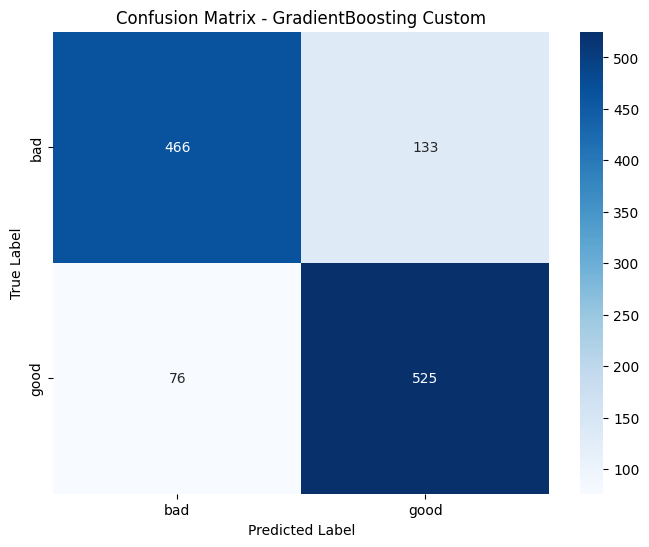

In [ ]:
#Оценка качества
custom_metrics = evaluate_model(y_test, y_pred_custom, "GradientBoosting Custom")

Модель обучается и предсказывает корректно. Однако кастомная  реализация градиентного бустинга показала более низкое качество, чем библиотечный baseline: все метрики просели примерно до 0.825.

In [ ]:
#Применяем лучшие гиперпараметры из GridSearch, увеличение признаков и масштабирование к кастомной модели
custom_improved = CustomGradientBoostingClassifier(n_estimators = 150, max_depth = 5, learning_rate = 0.1)
custom_improved.fit(X_train_scaled2, y_train)
y_pred_improved_custom = custom_improved.predict(X_test_scaled2)


GradientBoosting Improved Custom:
Accuracy: 0.8583
Precision: 0.8586
Recall: 0.8583
F1-score: 0.8583


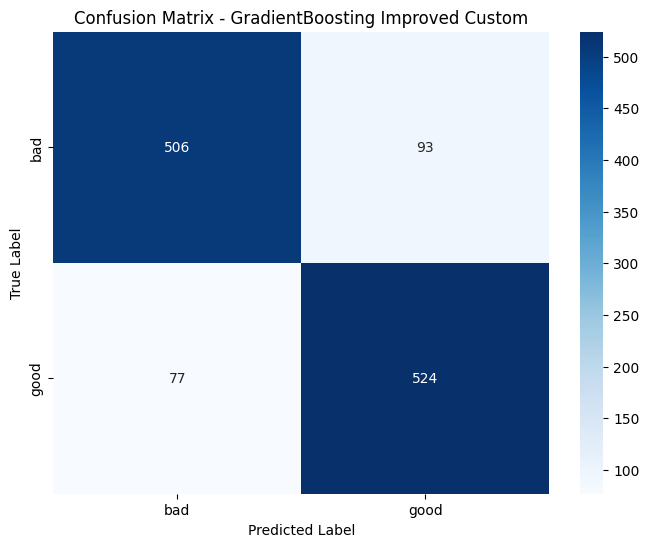

In [ ]:
#Оценка качества
custom_impoved_metrics = evaluate_model(y_test, y_pred_improved_custom, "GradientBoosting Improved Custom")

In [ ]:
#Сравнение всех метрик всех моделей
comparison_metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
    'Baseline GB': [
        base_metrics['accuracy'],
        base_metrics['precision'],
        base_metrics['recall'],
        base_metrics['f1']
    ],
    'Improved GB': [
        improved_metrics['accuracy'],
        improved_metrics['precision'],
        improved_metrics['recall'],
        improved_metrics['f1']
    ],
    'Custom GB': [
        custom_metrics['accuracy'],
        custom_metrics['precision'],
        custom_metrics['recall'],
        custom_metrics['f1']
    ],
    'Custom Improved GB': [
        custom_impoved_metrics['accuracy'],
        custom_impoved_metrics['precision'],
        custom_impoved_metrics['recall'],
        custom_impoved_metrics['f1']
    ]
})

print(comparison_metrics.to_string(index=False))

   Metric  Baseline GB  Improved GB  Custom GB  Custom Improved GB
 Accuracy     0.851667     0.873333   0.825833            0.858333
Precision     0.852220     0.873828   0.828774            0.858582
   Recall     0.851667     0.873333   0.825833            0.858333
 F1-score     0.851602     0.873287   0.825426            0.858305


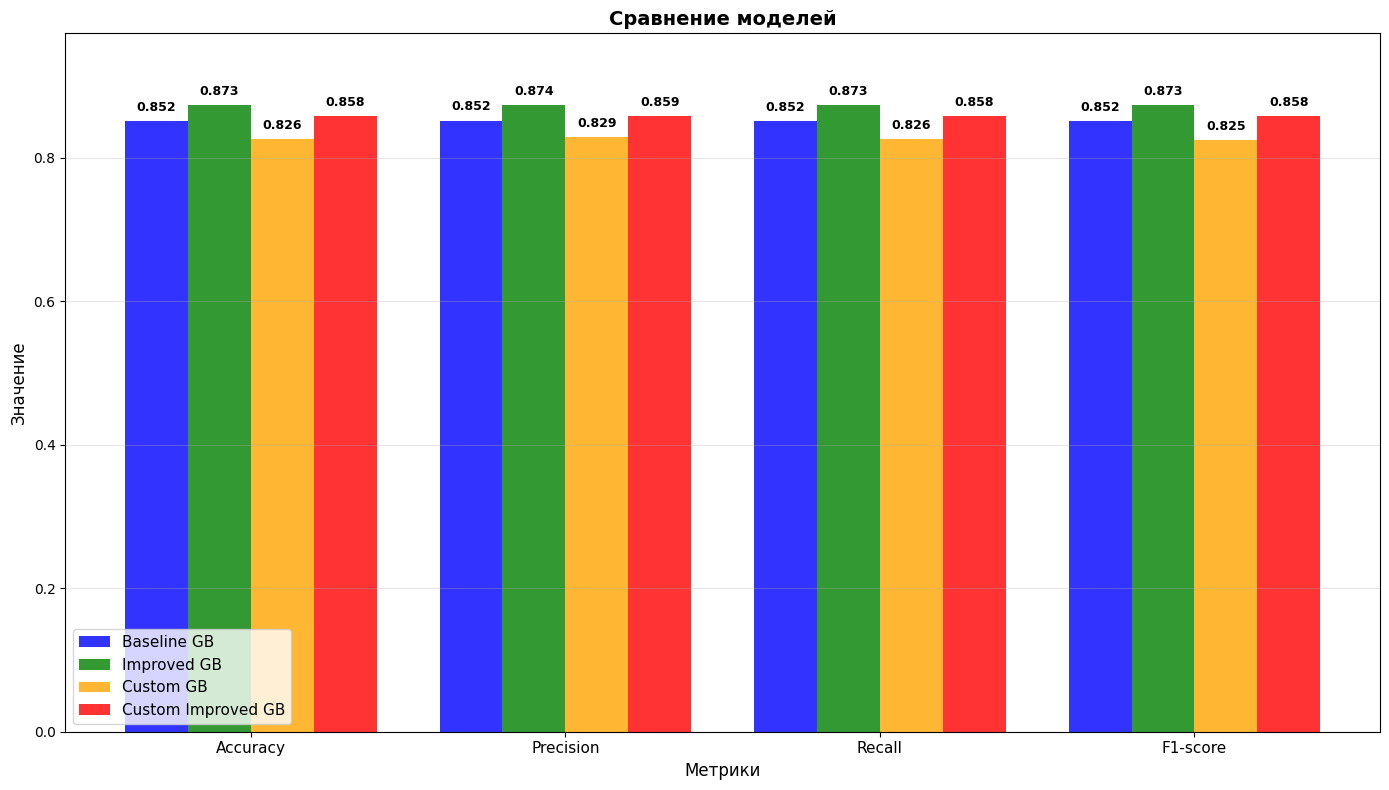

In [ ]:
#Визуализация сравнения
plt.figure(figsize=(14, 8))
x = np.arange(len(comparison_metrics))
width = 0.2

plt.bar(x - width*1.5, comparison_metrics['Baseline GB'], width,
        label='Baseline GB', alpha=0.8, color='blue')
plt.bar(x - width/2, comparison_metrics['Improved GB'], width,
        label='Improved GB', alpha=0.8, color='green')
plt.bar(x + width/2, comparison_metrics['Custom GB'], width,
        label='Custom GB', alpha=0.8, color='orange')
plt.bar(x + width*1.5, comparison_metrics['Custom Improved GB'], width,
        label='Custom Improved GB', alpha=0.8, color='red')

plt.xlabel('Метрики', fontsize=12)
plt.ylabel('Значение', fontsize=12)
plt.title('Сравнение моделей', fontsize=14, fontweight='bold')
plt.xticks(x, comparison_metrics['Metric'], fontsize=11)
plt.legend(fontsize=11)
plt.grid(axis='y', alpha=0.3)

#Добавляем значения над столбцами
for i in range(len(comparison_metrics)):
    plt.text(i - width*1.5, comparison_metrics['Baseline GB'][i] + 0.01,
             f'{comparison_metrics["Baseline GB"][i]:.3f}',
             ha='center', va='bottom', fontsize=9, fontweight='bold')
    plt.text(i - width/2, comparison_metrics['Improved GB'][i] + 0.01,
             f'{comparison_metrics["Improved GB"][i]:.3f}',
             ha='center', va='bottom', fontsize=9, fontweight='bold')
    plt.text(i + width/2, comparison_metrics['Custom GB'][i] + 0.01,
             f'{comparison_metrics["Custom GB"][i]:.3f}',
             ha='center', va='bottom', fontsize=9, fontweight='bold')
    plt.text(i + width*1.5, comparison_metrics['Custom Improved GB'][i] + 0.01,
             f'{comparison_metrics["Custom Improved GB"][i]:.3f}',
             ha='center', va='bottom', fontsize=9, fontweight='bold')

# Настраиваем пределы оси Y
max_val = max([comparison_metrics['Baseline GB'].max(), comparison_metrics['Improved GB'].max(), comparison_metrics['Custom GB'].max(), comparison_metrics['Custom Improved GB'].max()]) + 0.1
plt.ylim(0, min(max_val, 1.0))

plt.tight_layout()
plt.show()

Улучшенная GB показала лучший результат с метриками ~0.873, существенно опередив бейзлайн версию. Упрощённая кастомная модель изначально отставала, но её улучшенная версия достигла качества ~0.858, почти сравнявшись с бейзлайном.

## Задача регресии

### 2. Создание бейзлайна и оценка качества

In [ ]:
import pandas as pd
import numpy as np
from typing import Union, Optional
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('pizza_dataset.csv')
df.head(5)

,id,date,time,name,size,type,price,diameter_cm,weight_g,calories_per_100g,...,cheese_percent,crust_type,sauce_type,filling_density,area_cm2,density_g_per_cm2,total_calories,cook_efficiency,ingredient_intensity,price_final
0,2015-000001,2015-01-01,11:38:36,hawaiian,M,classic,13.25,29.498160,457.825488,279.125963,...,30.701562,regular,tomato,regular,683.061055,0.670256,1277.909802,0.309009,13.105430,50.00
1,2015-000002,2015-01-01,11:57:40,classic_dlx,M,classic,16.00,31.802857,481.340835,250.388400,...,16.691659,regular,tomato,regular,793.966056,0.606249,1205.221616,0.324397,6.232590,43.25
2,2015-000002,2015-01-01,11:57:40,mexicana,M,veggie,16.00,30.927976,439.468001,222.409110,...,20.847359,regular,bbq,medium,750.883653,0.585268,977.416871,0.353923,11.377393,48.75
3,2015-000002,2015-01-01,11:57:40,thai_ckn,L,chicken,20.75,36.394634,559.697009,248.607456,...,23.454774,regular,spicy_asian,regular,1039.786963,0.538280,1391.448496,0.384982,8.933405,59.50
4,2015-000002,2015-01-01,11:57:40,five_cheese,L,veggie,18.50,34.624075,568.288698,219.772790,...,39.873953,regular,tomato,medium,941.078833,0.603869,1248.943927,0.205297,10.558014,54.25


In [ ]:
df.describe()

,price,diameter_cm,weight_g,calories_per_100g,ingredient_count,complexity_score,cook_time_min,ingredient_cost,popularity_score,spiciness,cheese_percent,area_cm2,density_g_per_cm2,total_calories,cook_efficiency,ingredient_intensity,price_final
count,49574.000000,49574.000000,49574.000000,49574.000000,49574.000000,49574.000000,49574.000000,49574.000000,49574.000000,49574.000000,49574.000000,49574.000000,49574.000000,49574.000000,49574.000000,49574.000000,49574.000000
mean,16.497762,30.690807,519.536413,280.118177,4.589321,4.715436,14.003510,10.670071,7.557020,1.641062,25.094816,760.464989,0.726839,1466.373133,0.337399,9.308713,49.368757
std,3.621954,5.178817,105.254349,41.468638,1.261791,1.584733,2.674232,2.130618,1.143916,0.848082,6.607897,248.667386,0.168644,411.329991,0.099527,3.600500,6.464381
min,9.750000,22.000067,221.577230,167.018611,3.000000,2.000000,4.661094,3.571696,3.215589,1.000000,15.000000,379.942312,0.348741,438.197968,0.108497,3.599621,28.250000
25%,12.750000,25.457615,441.250844,250.983063,4.000000,4.000000,12.131075,9.164775,6.747760,1.000000,19.920477,508.750760,0.602715,1168.892845,0.265424,6.697684,44.750000
50%,16.500000,30.647272,518.115671,280.101598,5.000000,5.000000,14.068492,10.624668,7.496350,1.000000,24.703116,737.315394,0.695078,1432.259760,0.334680,8.557001,49.250000
75%,20.250000,35.503520,595.925838,310.706355,5.000000,6.000000,15.893498,12.129966,8.320789,2.000000,29.665115,989.492420,0.829394,1725.405439,0.404105,11.190773,54.000000
max,35.950000,49.982993,853.363727,425.023101,8.000000,8.000000,24.361009,19.520416,10.000000,4.000000,50.000000,1961.165170,1.393794,3364.563092,0.869375,32.349101,72.750000


In [ ]:
#Идентификация категориальных признаков
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Категориальные признаки: {categorical_cols}")

#Изучим уникальные значения в каждом категориальном признаке
for col in categorical_cols:
    unique_vals = df[col].nunique()
    print(f"\n{col}:")
    print(f"  Уникальных значений: {unique_vals}")

Категориальные признаки: ['id', 'date', 'time', 'name', 'size', 'type', 'crust_type', 'sauce_type', 'filling_density']

id:
  Уникальных значений: 21350

date:
  Уникальных значений: 358

time:
  Уникальных значений: 16382

name:
  Уникальных значений: 32

size:
  Уникальных значений: 5

type:
  Уникальных значений: 4

crust_type:
  Уникальных значений: 5

sauce_type:
  Уникальных значений: 6

filling_density:
  Уникальных значений: 3


In [ ]:
#Обработка категориальных признаков
df_processed = df.copy()

#Удаляем исходные столбцы date, time и id
df_processed = df_processed.drop(['date', 'time', 'id'], axis=1)

#One-Hot для основных категориальных признаков
categorical_to_encode = ['size', 'type', 'crust_type', 'sauce_type', 'filling_density']

#Для name используем частотное кодирование, так как много уникальных значений
name_freq = df_processed['name'].value_counts(normalize=True)
df_processed['name_freq'] = df_processed['name'].map(name_freq)
df_processed = df_processed.drop('name', axis=1)

#One-Hot для остальных категориальных признаков
df_processed = pd.get_dummies(df_processed, columns=categorical_to_encode, drop_first=True)

print(f"Количество признаков после One-Hot Encoding: {df_processed.shape[1]}")

Количество признаков после One-Hot Encoding: 36


In [ ]:
#Обработка пропусков
missing_values = df_processed.isnull().sum()

if missing_values.sum() == 0:
    print("Пропусков в данных нет")
else:
    #Заполняем пропуски медианой для числовых и модой для категориальных
    for col in df_processed.columns:
        if df_processed[col].isnull().sum() > 0:
            if df_processed[col].dtype in ['int64', 'float64']:
                df_processed[col].fillna(df_processed[col].median(), inplace=True)
            else:
                df_processed[col].fillna(df_processed[col].mode()[0], inplace=True)
    print("Пропуски обработаны")

Пропусков в данных нет


In [ ]:
#Разделение на признаки и целевую переменную
X = df_processed.drop('price_final', axis=1)
y = df_processed['price_final']

In [ ]:
#Перевод bool во float
X = X.astype(np.float64)
y = y.astype(np.float64)

In [ ]:
#Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

In [ ]:
#Обучение бейзлайна и предсказания
base_model = GradientBoostingRegressor()
base_model.fit(X_train, y_train)

y_pred = base_model.predict(X_test)

In [ ]:
#Функция для вычисления метрик
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    print(f"\n{model_name}:")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")

    return {'mae': mae, 'rmse': rmse, 'r2': r2}
    return mae, rmse, r2

In [ ]:
#Оценка бейзлайна
baseline_metrics = evaluate_model(y_test, y_pred, "Baseline GradientBoosting")


Baseline GradientBoosting:
MAE: 1.4721
RMSE: 1.8437
R² Score: 0.9193


Модель работает хорошо, ошибки небольшие, а объясняющая способность высокая.

### 3. Улучшение бейзлайна

Гипотеза 1: масштабирование признаков

Гипотеза 2: отбор наиболее значимых признаков

Гипотеза 3: подбор гиперпараметров

In [ ]:
#Масштабируем числовые признаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Обучаем модель на масштабированных данных
model_scaled = GradientBoostingRegressor()
model_scaled.fit(X_train_scaled, y_train)

y_pred_scaled = model_scaled.predict(X_test_scaled)
metrics_scaled = evaluate_model(y_test, y_pred_scaled, "С масштабированием")


С масштабированием:
MAE: 1.4710
RMSE: 1.8419
R² Score: 0.9195


После применения масштабирования метрики слегка улучшились, но разница настолько мала, что её можно считать незначимой.

In [ ]:
#Определяем оптимальное количество признаков с помощью кросс-валидации
k_values = [10, 20, 30, X_train.shape[1]]
k_scores = []

for k in k_values:
    if k <= X_train.shape[1]:
        selector = SelectKBest(score_func=f_regression, k=k)
        X_train_selected = selector.fit_transform(X_train, y_train)

        #Обучаем модель на отобранных признаках
        model_k = GradientBoostingRegressor()
        score = cross_val_score(model_k, X_train_selected, y_train,
                               cv=5, scoring='r2').mean()
        k_scores.append(score)
        print(f"k={k}: R² = {score:.4f}")

#Определяем оптимальное k
optimal_k = k_values[np.argmax(k_scores)]
print(f"\nОптимальное количество признаков: {optimal_k} (R² = {max(k_scores):.4f})")

k=10: R² = 0.8983
k=20: R² = 0.9152
k=30: R² = 0.9164
k=35: R² = 0.9164

Оптимальное количество признаков: 30 (R² = 0.9164)


In [ ]:
#Применяем SelectKBest с оптимальным k
selector_kbest = SelectKBest(score_func=f_regression, k=optimal_k)
X_train_kbest = selector_kbest.fit_transform(X_train, y_train)
X_test_kbest = selector_kbest.transform(X_test)

#Обучаем модель на отобранных признаках
model_kbest = GradientBoostingRegressor()
model_kbest.fit(X_train_kbest, y_train)
y_pred_kbest = model_kbest.predict(X_test_kbest)

metrics_kbest = evaluate_model(y_test, y_pred_kbest, f"SelectKBest (k={optimal_k})")


SelectKBest (k=30):
MAE: 1.4722
RMSE: 1.8438
R² Score: 0.9193


Применение SelectKBest (k=30) практически не повлияло на качество модели. Все метрики остались на уровне бейзлайна с точностью до тысячных.

In [ ]:
#Подбор гиперпараметров
param_distributions = {
     'n_estimators': [50, 100, 150],
     'learning_rate': [0.01, 0.05, 0.1],
     'max_depth': [3, 5, 7],
     'min_samples_split': [2, 5, 10]
}

random_search = RandomizedSearchCV(GradientBoostingRegressor(),
                                  param_distributions,
                                  n_iter=10,
                                  cv=3,
                                  scoring='neg_mean_squared_error',
                                  n_jobs=-1,
                                  verbose=1)

random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 5, 7],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150]},
                   scoring='neg_mean_squared_error', verbose=1)

In [ ]:
print(f"Лучшие параметры: {random_search.best_params_}")

Лучшие параметры: {'n_estimators': 50, 'min_samples_split': 2, 'max_depth': 7, 'learning_rate': 0.1}


In [ ]:
#Модель с лучшими параметрами
param_model = random_search.best_estimator_
y_pred_param = param_model.predict(X_test)

params_metrics = evaluate_model(y_test, y_pred_param, "Подбор гиперпараметров")


Подбор гиперпараметров:
MAE: 1.4541
RMSE: 1.8264
R² Score: 0.9208


Подбор гиперпараметров дал наиболее заметное улучшение по сравнению с масштабированием и выбором признаков. Все метрики стабильно улучшились.

Применим все гипотезы для улучшенной модели

In [ ]:
#Масштабируем выбранные признаки
X_train_scaled2 = scaler.fit_transform(X_train_kbest)
X_test_scaled2 = scaler.transform(X_test_kbest)

#Обучаем модель с гиперпараметрами
model_impoved = GradientBoostingRegressor(n_estimators = 50,  min_samples_split = 2, max_depth = 7, learning_rate = 0.1)
model_impoved.fit(X_train_scaled2, y_train)

y_pred_imp = model_impoved.predict(X_test_scaled2)
improved_metrics = evaluate_model(y_test, y_pred_imp, "Улучшенная модель")


Улучшенная модель:
MAE: 1.4553
RMSE: 1.8267
R² Score: 0.9208


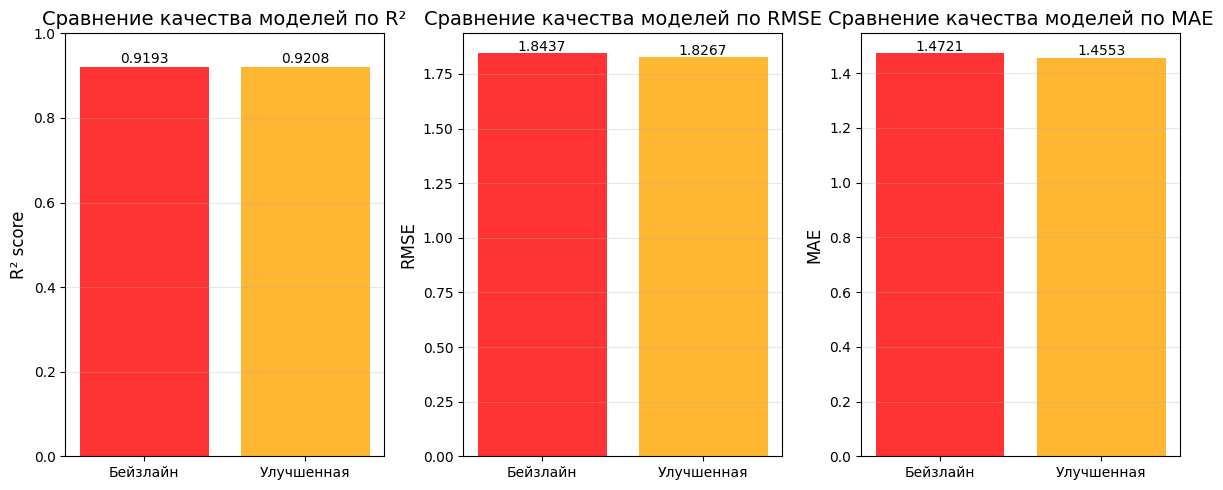

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
models = ['Бейзлайн',  'Улучшенная']
r2_values = [baseline_metrics['r2'],  improved_metrics['r2']]
colors = ['red', 'orange', 'green']

bars = plt.bar(models, r2_values, color=colors, alpha=0.8)
plt.ylabel('R² score', fontsize=12)
plt.title('Сравнение качества моделей по R²', fontsize=14)
plt.ylim(0, 1)
for bar, value in zip(bars, r2_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{value:.4f}', ha='center', fontsize=10)
plt.grid(True, alpha=0.3, axis='y')

plt.subplot(1, 3, 2)
rmse_values = [baseline_metrics['rmse'],  improved_metrics['rmse']]
bars = plt.bar(models, rmse_values, color=colors, alpha=0.8)
plt.ylabel('RMSE', fontsize=12)
plt.title('Сравнение качества моделей по RMSE', fontsize=14)
for bar, value in zip(bars, rmse_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{value:.4f}', ha='center', fontsize=10)
plt.grid(True, alpha=0.3, axis='y')

plt.subplot(1, 3, 3)
mae_values = [baseline_metrics['mae'],  improved_metrics['mae']]
bars = plt.bar(models, mae_values, color=colors, alpha=0.8)
plt.ylabel('MAE', fontsize=12)
plt.title('Сравнение качества моделей по MAE', fontsize=14)
for bar, value in zip(bars, mae_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{value:.4f}', ha='center', fontsize=10)
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

Улучшенная модель демонстрирует стабильный прирост качества по всем метрикам по сравнению с бейзлайном. Ошибки предсказания снизились, а объясняющая способность модели (R²) немного увеличилась. Хотя улучшения не кардинальны, они статистически значимы и показывают, что оптимизация модели дала положительный результат.

### 4.	Имплементация алгоритма машинного обучения

In [ ]:
#Hеализация градиентного бустинга
class CustomGradientBoostingRegressor:

    def __init__(self, n_estimators: int = 100, learning_rate: float = 0.1,
                 max_depth: int = 3, min_samples_split: int = 2,
                 subsample: float = 1.0, random_state: Optional[int] = None):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.subsample = subsample
        self.random_state = random_state

        self.trees = []
        self.initial_prediction = None
        self.feature_names = None
        self.is_fitted = False

    class DecisionTreeRegressor:

        def __init__(self, max_depth: int = 3, min_samples_split: int = 2):
            self.max_depth = max_depth
            self.min_samples_split = min_samples_split
            self.tree = None
            self.feature_indices = None

        def _mse(self, y: np.ndarray) -> float:
            if len(y) == 0:
                return 0
            return np.mean((y - np.mean(y)) ** 2)

        #Разделение данных по порогу
        def _split(self, X: np.ndarray, y: np.ndarray,
                  feature_idx: int, threshold: float):
            left_mask = X[:, feature_idx] <= threshold
            right_mask = ~left_mask
            return left_mask, right_mask

        #Поиск наилучшего разделения
        def _find_best_split(self, X: np.ndarray, y: np.ndarray):

            best_mse = float('inf')
            best_feature = None
            best_threshold = None

            n_samples, n_features = X.shape

            for feature_idx in range(n_features):
                unique_values = np.unique(X[:, feature_idx])

                if len(unique_values) > 100:
                    indices = np.random.choice(len(unique_values),
                                              size=100, replace=False)
                    thresholds = unique_values[indices]
                else:
                    thresholds = unique_values

                for threshold in thresholds:
                    left_mask, right_mask = self._split(X, y, feature_idx, threshold)

                    if (len(y[left_mask]) < self.min_samples_split or
                        len(y[right_mask]) < self.min_samples_split):
                        continue

                    mse_left = self._mse(y[left_mask])
                    mse_right = self._mse(y[right_mask])

                    total_mse = (len(y[left_mask]) * mse_left +
                                len(y[right_mask]) * mse_right) / n_samples

                    if total_mse < best_mse:
                        best_mse = total_mse
                        best_feature = feature_idx
                        best_threshold = threshold

            return best_feature, best_threshold, best_mse

        def _build_tree(self, X: np.ndarray, y: np.ndarray, depth: int = 0):

            if (depth >= self.max_depth or
                len(y) < self.min_samples_split or
                np.var(y) < 1e-6):
                return np.mean(y)

            feature_idx, threshold, mse = self._find_best_split(X, y)

            if feature_idx is None or mse < 1e-6:
                return np.mean(y)

            left_mask, right_mask = self._split(X, y, feature_idx, threshold)

            if len(y[left_mask]) == 0 or len(y[right_mask]) == 0:
                return np.mean(y)

            left_subtree = self._build_tree(X[left_mask], y[left_mask], depth + 1)
            right_subtree = self._build_tree(X[right_mask], y[right_mask], depth + 1)

            return {
                'feature': feature_idx,
                'threshold': threshold,
                'left': left_subtree,
                'right': right_subtree,
                'value': np.mean(y),
                'mse': mse
            }

        def _predict_sample(self, x: np.ndarray, tree: dict) -> float:
            if not isinstance(tree, dict):
                return tree

            if x[tree['feature']] <= tree['threshold']:
                return self._predict_sample(x, tree['left'])
            else:
                return self._predict_sample(x, tree['right'])

        def fit(self, X: np.ndarray, y: np.ndarray):
            self.tree = self._build_tree(X, y)

        def predict(self, X: np.ndarray) -> np.ndarray:
            predictions = np.zeros(len(X))
            for i in range(len(X)):
                predictions[i] = self._predict_sample(X[i], self.tree)
            return predictions

    def _convert_to_numpy(self, data: Union[pd.DataFrame, pd.Series, np.ndarray]) -> np.ndarray:
        if isinstance(data, (pd.DataFrame, pd.Series)):
            return data.values
        return data

    def fit(self, X: Union[pd.DataFrame, np.ndarray],
            y: Union[pd.Series, np.ndarray]):

        if self.random_state is not None:
            np.random.seed(self.random_state)

        X_np = self._convert_to_numpy(X)
        y_np = self._convert_to_numpy(y).ravel()

        if isinstance(X, pd.DataFrame):
            self.feature_names = X.columns.tolist()

        self.initial_prediction = np.mean(y_np)
        predictions = np.full_like(y_np, self.initial_prediction, dtype=np.float64)


        for i in range(self.n_estimators):
            residuals = y_np - predictions

            tree = self.DecisionTreeRegressor(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split
            )

            n_samples = len(X_np)
            if self.subsample < 1.0:
                sample_size = int(self.subsample * n_samples)
                sample_indices = np.random.choice(
                    n_samples, size=sample_size, replace=False
                )
            else:
                sample_indices = np.arange(n_samples)

            tree.fit(X_np[sample_indices], residuals[sample_indices])

            tree_predictions = tree.predict(X_np)

            predictions += self.learning_rate * tree_predictions

            self.trees.append(tree)


        self.is_fitted = True

    def predict(self, X: Union[pd.DataFrame, np.ndarray]) -> np.ndarray:

        X_np = self._convert_to_numpy(X)

        predictions = np.full(len(X_np), self.initial_prediction, dtype=np.float64)

        for tree in self.trees:
            predictions += self.learning_rate * tree.predict(X_np)

        return predictions

    def get_feature_importance(self) -> dict:
        if not self.trees:
            return {}

        importance = {}
        for tree in self.trees:
            self._collect_feature_importance(tree.tree, importance)

        total = sum(importance.values())
        if total > 0:
            importance = {k: v/total for k, v in importance.items()}

        return dict(sorted(importance.items(), key=lambda x: x[1], reverse=True))

    #Сбор важности признаков из дерева
    def _collect_feature_importance(self, tree: dict, importance: dict):
        if not isinstance(tree, dict):
            return

        feature_idx = tree['feature']
        importance[feature_idx] = importance.get(feature_idx, 0) + 1

        if isinstance(tree['left'], dict):
            self._collect_feature_importance(tree['left'], importance)
        if isinstance(tree['right'], dict):
            self._collect_feature_importance(tree['right'], importance)

    def score(self, X: Union[pd.DataFrame, np.ndarray],
              y: Union[pd.Series, np.ndarray]) -> float:
        y_pred = self.predict(X)
        y_true = self._convert_to_numpy(y).ravel()

        ss_res = np.sum((y_true - y_pred) ** 2)
        ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)

        return 1 - (ss_res / ss_tot)

    def get_params(self) -> dict:
        return {
            'n_estimators': self.n_estimators,
            'learning_rate': self.learning_rate,
            'max_depth': self.max_depth,
            'min_samples_split': self.min_samples_split,
            'subsample': self.subsample,
            'random_state': self.random_state
        }

In [ ]:
#Обучение и предсказание кастомной модели
custom_tree = CustomGradientBoostingRegressor()
custom_tree.fit(X_train, y_train)

y_pred_custom = custom_tree.predict(X_test)

In [ ]:
#Метрики
custom_metrics = evaluate_model(y_test, y_pred_custom, "Custom GradientBosting")


Custom GradientBosting:
MAE: 1.4697
RMSE: 1.8418
R² Score: 0.9195


Кастомная реализация градиентного бустинга показывает очень хорошие результаты. Модель хорошо обучается на данных и делает точные предсказания.

In [ ]:
print("\nРазница в метриках (кастомна реализация - sklearn):")
print(f"MAE: {mean_absolute_error(y_test, y_pred_custom) - mean_absolute_error(y_test, y_pred):.6f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_custom)) - np.sqrt(mean_squared_error(y_test, y_pred)):.6f}")
print(f"R²: {r2_score(y_test, y_pred_custom) - r2_score(y_test, y_pred):.6f}")


Разница в метриках (кастомна реализация - sklearn):
MAE: -0.002467
RMSE: -0.001895
R²: 0.000166


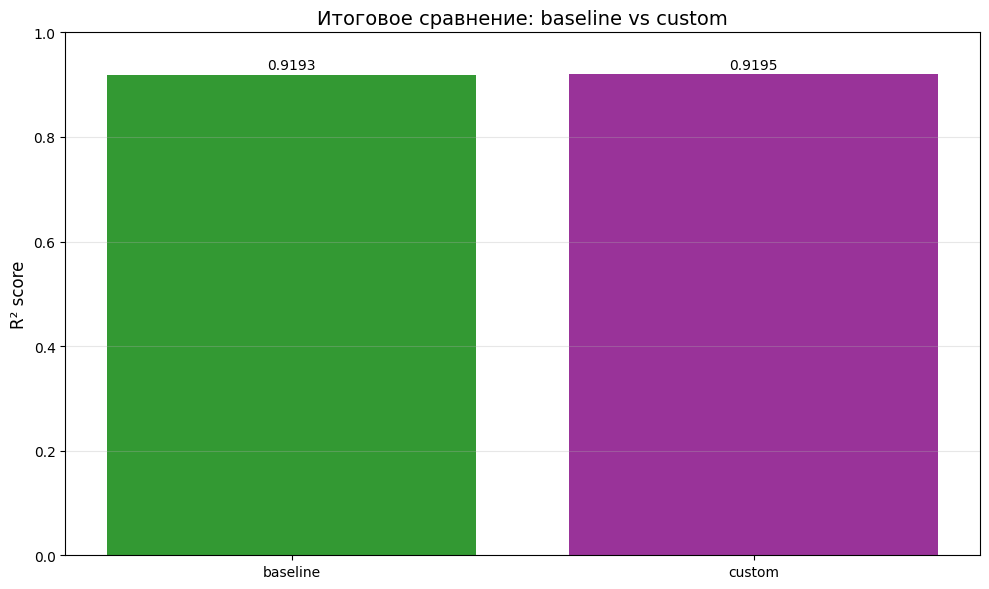

In [ ]:
#Визуализация итогового сравнения
plt.figure(figsize=(10, 6))
models_final = ['baseline', 'custom']
r2_final = [baseline_metrics['r2'], custom_metrics['r2']]
colors_final = ['green', 'purple']

bars = plt.bar(models_final, r2_final, color=colors_final, alpha=0.8)
plt.ylabel('R² score', fontsize=12)
plt.title('Итоговое сравнение: baseline vs custom', fontsize=14)
plt.ylim(0, 1)
for bar, value in zip(bars, r2_final):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{value:.4f}', ha='center', fontsize=10)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

Кастомная модель успешно воспроизводит логику градиентного бустинга и достигает сравнимой точности, что подтверждает корректность реализации. Разница между метриками кастомной и sklearn реализаций минимальна.

In [ ]:
#Используем все улучшения на кастомной модели
custom_model_improved = CustomGradientBoostingRegressor(n_estimators = 50,  min_samples_split = 2, max_depth = 7, learning_rate = 0.1)
custom_model_improved.fit(X_train_scaled2, y_train)

y_pred_custom_improved = custom_model_improved.predict(X_test_scaled2)
custom_improved_metrics = evaluate_model(y_test, y_pred_custom_improved, "Custom Improved")


Custom Improved:
MAE: 1.4564
RMSE: 1.8295
R² Score: 0.9206


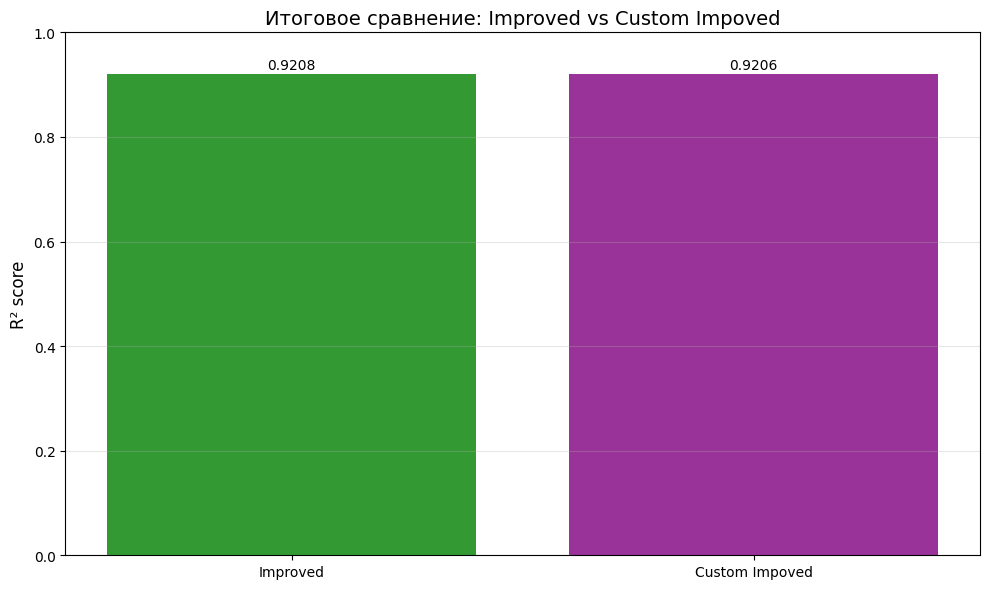

In [ ]:
#Визуализация итогового сравнения
plt.figure(figsize=(10, 6))
models_final = ['Improved', 'Custom Impoved']
r2_final = [improved_metrics['r2'], custom_improved_metrics['r2']]
colors_final = ['green', 'purple']

bars = plt.bar(models_final, r2_final, color=colors_final, alpha=0.8)
plt.ylabel('R² score', fontsize=12)
plt.title('Итоговое сравнение: Improved vs Custom Impoved', fontsize=14)
plt.ylim(0, 1)
for bar, value in zip(bars, r2_final):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{value:.4f}', ha='center', fontsize=10)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

 Улучшенная кастомная модель практически не уступает sklearn-версии, демонстрируя сравнимую точность

In [ ]:
final_comparison = pd.DataFrame({
    'Baseline GB': baseline_metrics,
    'Improved GB': improved_metrics,
    'Custom GB': custom_metrics,
    'Improved Custom GB': custom_improved_metrics
}).T

print("Сравнение метрик всех версий:")
print(final_comparison)

Сравнение метрик всех версий:
                         mae      rmse        r2
Baseline GB         1.472144  1.843739  0.919336
Improved GB         1.455316  1.826746  0.920816
Custom GB           1.469677  1.841844  0.919502
Improved Custom GB  1.456425  1.829473  0.920579


Наилучшие результаты демонстрирует улучшенная библиотечная модель Gradient Boosting, которая достигла минимальных ошибок. Подбор гиперпараметров оказался самым эффективным способом повышения точности для обеих реализаций.

##Выводы по 1-5 ЛР

###Задача классификации

Численно наивысшую точность продемонстрировал **улучшенный алгоритм KNN** с показателем Accuracy 0.8975, что на 0.0033 выше его базовой версии. За ним следует **улучшенный случайный лес** с Accuracy 0.8875, который практически сохранил качество базовой модели, снизив его всего на 0.0017. **Градиентный бустинг** показал значительный рост **после улучшений** — с 0.8517 до 0.8733.

Наибольший абсолютный прирост продемонстрировала **логистическая регрессия**: её Accuracy увеличилась с 0.7450 до 0.8575, то есть на 0.1125, что более чем на 15% относительно базового уровня. Это подтверждает важность этапа предобработки данных и создания новых признаков для линейных методов. При этом собственная реализация логистической регрессии оказалась менее эффективной, но после применения техник из улучшенного бейзлайна её результаты приблизились к библиотечной версии.

**Решающее дерево** улучшилось скромнее — с 0.7975 до 0.8050, прирост составил 0.0075.

Важно отметить, что во всех случаях улучшенные модели превзошли baseline, что доказывает ценность проведённых этапов: препроцессинга, визуализации, генерации признаков и подбора гиперпараметров. Собственные реализации алгоритмов в большинстве случаев уступали библиотечным версиям на 0.01–0.05 по Accuracy.

###Задача регресии

Наилучшие результаты в целом продемонстрировала улучшенная линейная регрессия, которая показала самые низкие значения ошибок MAE 1.402379 и RMSE 1.758877 при высоком R² 0.926590. При этом улучшенные версии этих алгоритмов превзошли базовые реализации, хотя и не так существенно.

Самый заметный качественный скачок после улучшений наблюдался у метода KNN: его R² вырос с 0.71 до 0.90, что подтверждает высокую чувствительность этого алгоритма к масштабированию данных и выбору гиперпараметров.

В целом эксперименты подтвердили, что для задачи регрессии наиболее эффективными оказались ансамблевые методы и линейная регрессия, а наибольший выигрыш от улучшений получили KNN и решающее дерево. Это еще раз подчеркивает, что даже для простых алгоритмов тщательный препроцессинг и настройка гиперпараметров могут радикально повысить качество прогноза. Собственные реализации уступали библиотечным, но всё же позволяли получить конкурентные результаты.